| Columna       | Tipo de Variable          | Descripción Breve |
|---------------|---------------------------|-------------------|
| `age`         | Numérica entera           | Edad de la persona en años. |
| `weight`      | Numérica entera           | Peso de la persona en kilogramos. |
| `height`      | Numérica entera           | Altura de la persona en centímetros. |
| `exercise`    | Categórica ordinal        | Nivel de ejercicio físico (none, low, medium, high). |
| `sleep`       | Numérica continua         | Horas promedio de sueño diario. |
| `sugar_intake`| Categórica ordinal        | Nivel de consumo de azúcar (low, medium, high). |
| `smoking`     | Categórica binaria        | Indicador de si la persona fuma (yes, no). |
| `alcohol`     | Categórica binaria        | Indicador de si la persona consume alcohol (yes, no). |
| `married`     | Categórica binaria        | Indicador de si la persona está casada (yes, no). |
| `profession`  | Categórica nominal        | Ocupación de la persona (ej. office_worker, teacher, artist). |
| `bmi`         | Numérica continua         | Índice de masa corporal calculado. |
| `health_risk` | Categórica binaria        | Nivel de riesgo para la salud (low, high). |

In [99]:
from pathlib import Path
import pandas as pd

# Asumiendo que ejecutas el notebook desde la raíz o desde la carpeta notebooks
base_path = Path("..") if Path().cwd().name == "notebooks" else Path(".")
datos_path = base_path / "datos" / "health_data.csv"

df = pd.read_csv(datos_path)



In [100]:
# Numero de filas y columnas
print("Numero de filas : " , df.shape[0])
print("Numero de columnas : " , df.shape[1])
# Celdas vacias
print('Celdas vacias' , df.isnull().sum())

Numero de filas :  5000
Numero de columnas :  13
Celdas vacias age               0
height_cm         0
weight_kg         0
gender            0
exercise_level    0
smoking           0
alcohol_weekly    0
sleep_hours       0
sugar_intake      0
profession        0
bmi               0
health_risk       0
married           0
dtype: int64


In [101]:
# Resumen de las columnas + datos unicos por columna

print(f"{str("-----"*9):^50}")
print(f"|{"Columna":^25} | {"Tipo":^10} | {"Unicos":^5}| ")
print(f"{str("-----"*9):^50}")
for name_col in df:
    print(f"|{name_col:<25} | {str(df[name_col].dtype):<10} | {str(df[name_col].nunique()):<5} |")
print(f"{str("-----"*9):^50}")



  ---------------------------------------------   
|         Columna          |    Tipo    | Unicos| 
  ---------------------------------------------   
|age                       | int64      | 68    |
|height_cm                 | int64      | 51    |
|weight_kg                 | int64      | 94    |
|gender                    | object     | 2     |
|exercise_level            | object     | 4     |
|smoking                   | int64      | 2     |
|alcohol_weekly            | int64      | 9     |
|sleep_hours               | float64    | 4973  |
|sugar_intake              | object     | 3     |
|profession                | object     | 8     |
|bmi                       | float64    | 1532  |
|health_risk               | int64      | 2     |
|married                   | int64      | 2     |
  ---------------------------------------------   


In [105]:
# Convertir en categoricas las columnas que tienen pocos valores unicos
columnas_a_categoricas = ['exercise_level','gender', 'sugar_intake','profession']
for col in columnas_a_categoricas:
    df[col] = df[col].astype('category')

In [106]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   age             5000 non-null   int64   
 1   height_cm       5000 non-null   int64   
 2   weight_kg       5000 non-null   int64   
 3   gender          5000 non-null   category
 4   exercise_level  5000 non-null   category
 5   smoking         5000 non-null   category
 6   alcohol_weekly  5000 non-null   int64   
 7   sleep_hours     5000 non-null   float64 
 8   sugar_intake    5000 non-null   category
 9   profession      5000 non-null   category
 10  bmi             5000 non-null   float64 
 11  health_risk     5000 non-null   int64   
 12  married         5000 non-null   int64   
dtypes: category(5), float64(2), int64(6)
memory usage: 338.0 KB


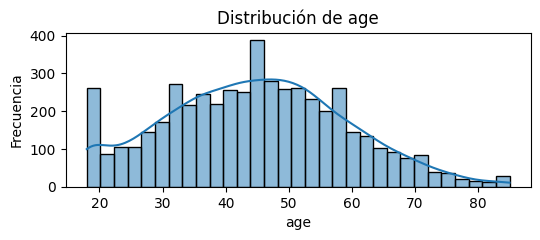

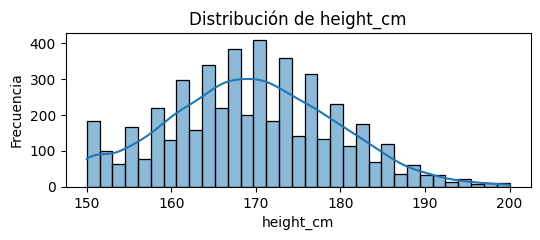

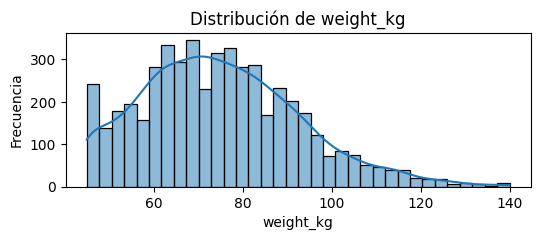

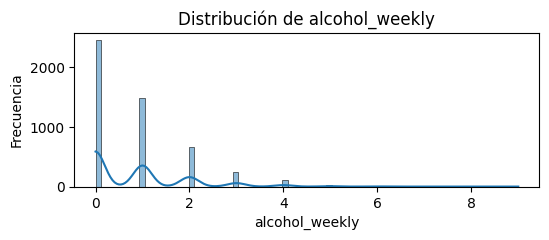

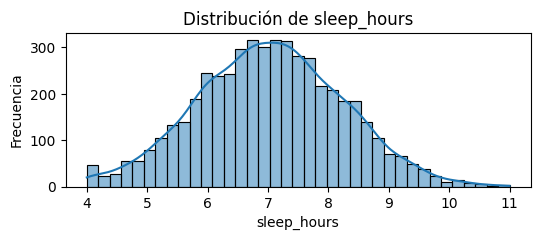

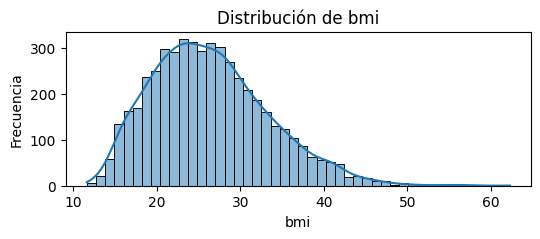

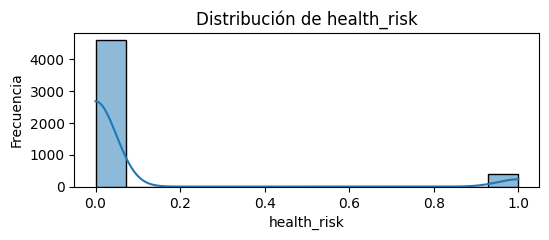

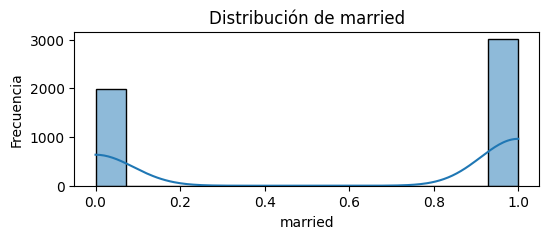

In [107]:
# Graficas de distribucion para variables numericas
import matplotlib.pyplot as plt
import seaborn as sns

numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

for col in numerical_cols:
    plt.figure(figsize=(6, 2))
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribución de {col}')
    plt.xlabel(col)
    plt.ylabel('Frecuencia')
    plt.show()

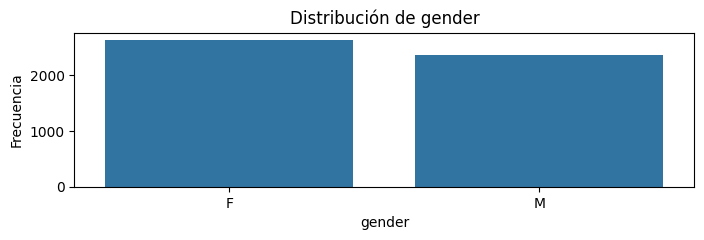

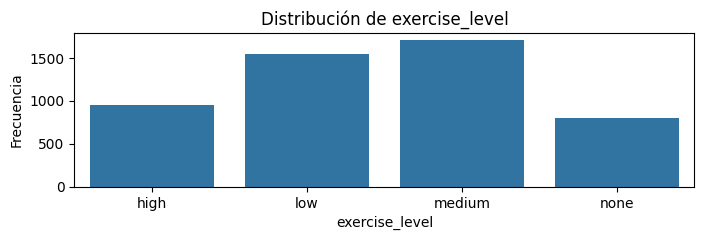

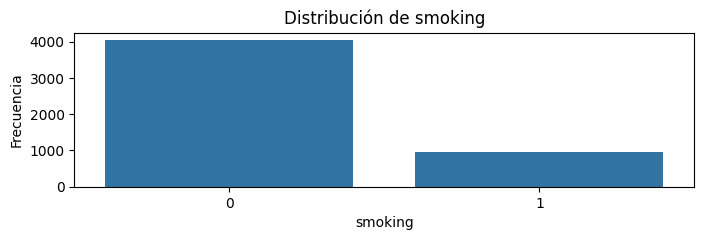

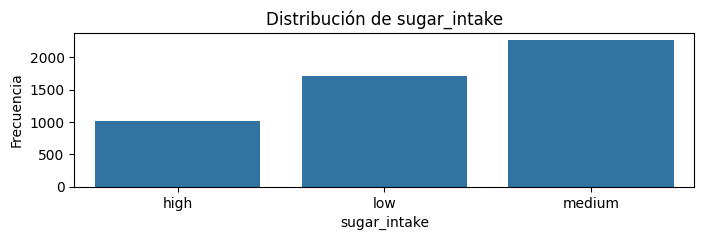

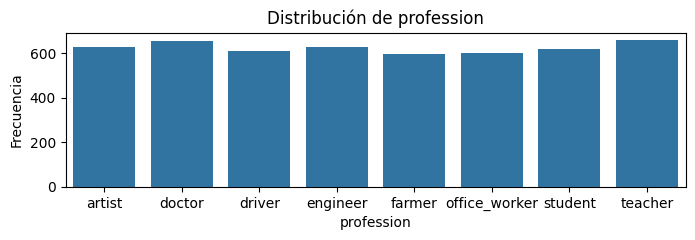

In [108]:
# Graficas de distribucion para variables categoricas

categorical_cols = df.select_dtypes(include=['category']).columns
for col in categorical_cols:
    plt.figure(figsize=(8, 2))
    sns.countplot(x=df[col])
    plt.title(f'Distribución de {col}')
    plt.xlabel(col)
    plt.ylabel('Frecuencia')
    plt.show()

## ANALISIS
- Se ve que las columnas que tienen dos variables se puede transformar en binarias y poder hacer una mejor exploracion.
- la variable objetivo es health_risk

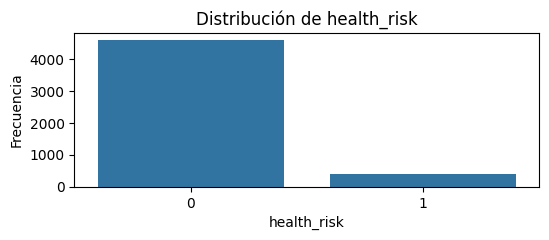

In [112]:
# graficas de las variables objetivo
plt.figure(figsize=(6, 2))
sns.countplot(x=df['health_risk'])
plt.title('Distribución de health_risk')
plt.xlabel('health_risk')
plt.ylabel('Frecuencia')
plt.show()

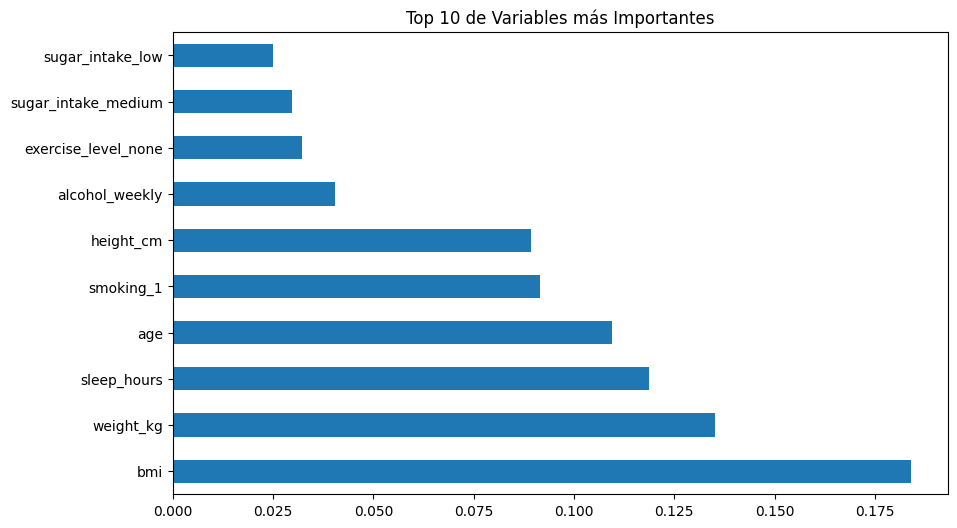

In [122]:
importances = pd.Series(model.feature_importances_, index=X.columns)
importances.sort_values(ascending=False).head(10).plot(kind='barh', figsize=(10,6))
plt.title("Top 10 de Variables más Importantes")
plt.show()

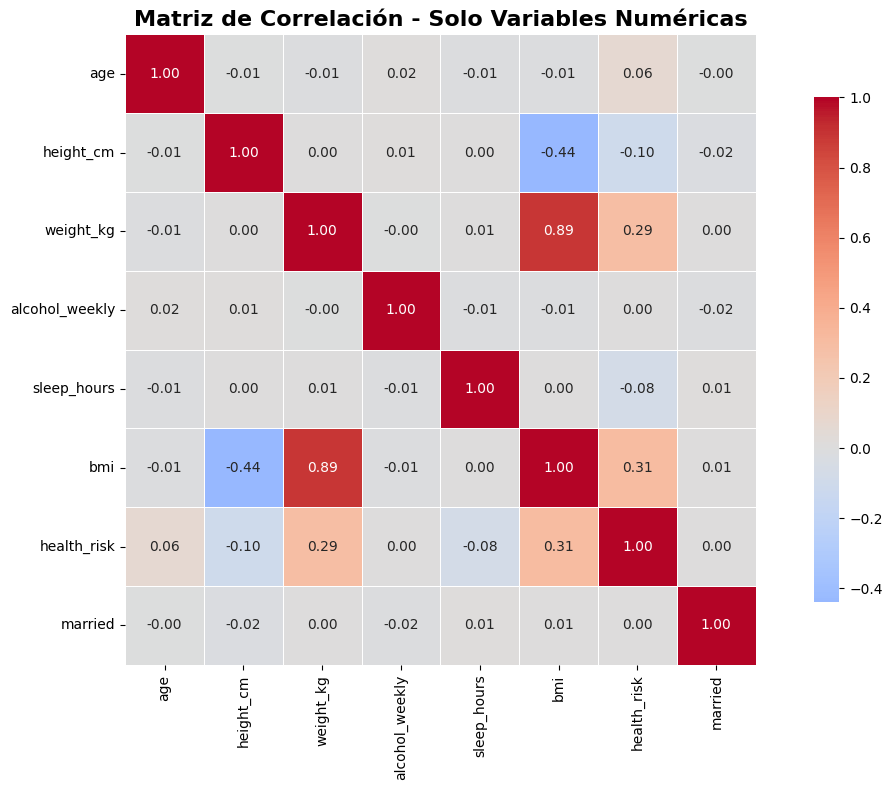

In [ ]:
# --- HEATMAP CORRECTO ---
import seaborn as sns
import matplotlib.pyplot as plt

# Solo numéricas
numeric_cols = df.select_dtypes(include=['number']).columns
corr = df[numeric_cols].corr()

plt.figure(figsize=(12, 8))
sns.heatmap(corr, 
            annot=True, 
            fmt=".2f", 
            cmap='coolwarm', 
            center=0,
            square=True,
            linewidths=.5,
            cbar_kws={"shrink": .8})
plt.title("Matriz de Correlación - Solo Variables Numéricas", fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

